In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("bank-full.csv", sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 17)

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# Numerical variables
num_data = data.select_dtypes(include='number')
num_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [8]:
# Categorical variables
cat_data = data.select_dtypes(exclude='number')
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


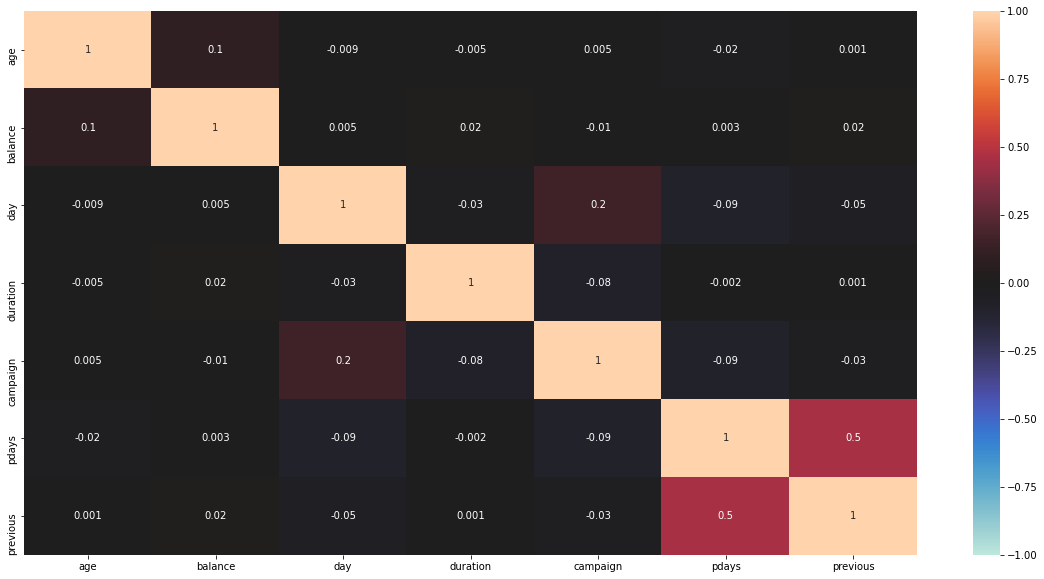

In [9]:
# using heatmap to visualize correlation between the columns
plt.figure(figsize=(20,10))
ax = sns.heatmap(data.corr(), annot=True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)# setting the parameters
plt.show()

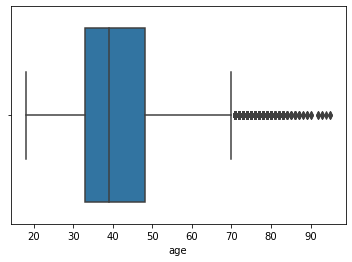

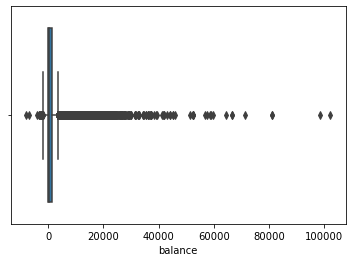

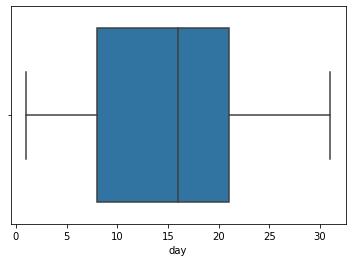

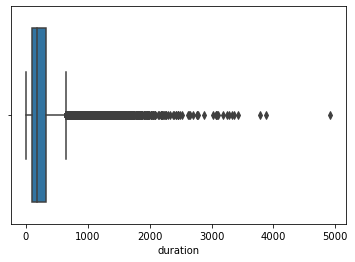

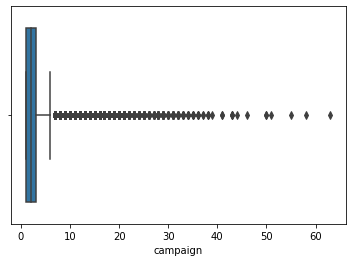

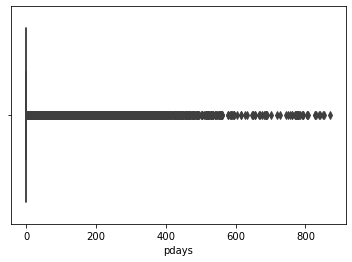

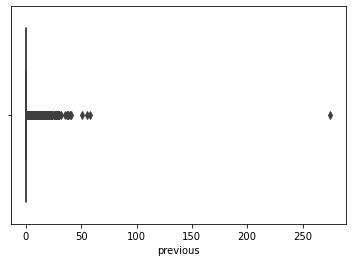

In [10]:
# Using boxplot to identify outliers
for col in num_data:
    ax = sns.boxplot(num_data[col])
    plt.show()

In [12]:
# Copying the dataset to a new df to handle outliers
data_new = data.copy(deep=True)
data_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
# treating outliers
count = 1
for col in num_data:
    Q1 = num_data[col].quantile(0.25)
    Q3 = num_data[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f'column {count}: {num_data[col].name}\n------------------------')
    print('1st quantile => ',Q1)
    print('3rd quantile => ',Q3)
    print('IQR =>',IQR)

    fence_low  = Q1-(1.5*IQR)
    print('fence_low => ' + str(fence_low))

    fence_high = Q3+(1.5*IQR)
    print('fence_high => ' + str(fence_high))
    print("\n------------------------")
    
    count = count + 1
    
    #replacing outliers with nan
    data_new[col][((data_new[col] < fence_low) |(data_new[col] > fence_high))] = np.nan

column 1: age
------------------------
1st quantile =>  33.0
3rd quantile =>  48.0
IQR => 15.0
fence_low => 10.5
fence_high => 70.5

------------------------
column 2: balance
------------------------
1st quantile =>  72.0
3rd quantile =>  1428.0
IQR => 1356.0
fence_low => -1962.0
fence_high => 3462.0

------------------------
column 3: day
------------------------
1st quantile =>  8.0
3rd quantile =>  21.0
IQR => 13.0
fence_low => -11.5
fence_high => 40.5

------------------------
column 4: duration
------------------------
1st quantile =>  103.0
3rd quantile =>  319.0
IQR => 216.0
fence_low => -221.0
fence_high => 643.0

------------------------
column 5: campaign
------------------------
1st quantile =>  1.0
3rd quantile =>  3.0
IQR => 2.0
fence_low => -2.0
fence_high => 6.0

------------------------
column 6: pdays
------------------------
1st quantile =>  -1.0
3rd quantile =>  -1.0
IQR => 0.0
fence_low => -1.0
fence_high => -1.0

------------------------
column 7: previous
-------

In [14]:
# checking the columns which outliers were replace with nan
print(data_new.select_dtypes(include='number').isnull().sum())

age          487
balance     4729
day            0
duration    3235
campaign    3064
pdays       8257
previous    8257
dtype: int64


In [16]:
# Dealing with the nan values

# mode
columns_mode = ['age', 'pdays']
for col in columns_mode:
    data_new[col].fillna(data_new[col].mode()[0], inplace=True)
    
# median
columns_median = ['balance', 'duration', 'campaign', 'previous']
for col in columns_median:
    data_new[col].fillna(data_new[col].median(), inplace=True)

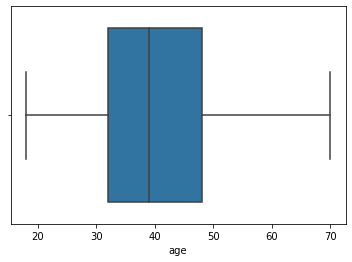

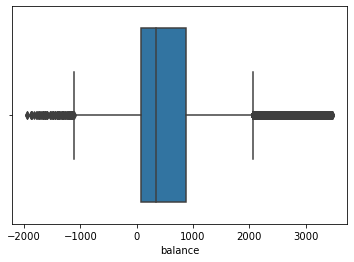

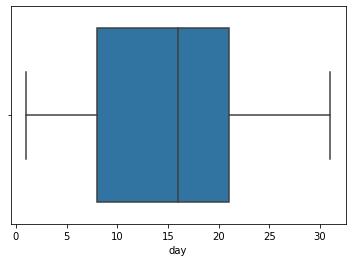

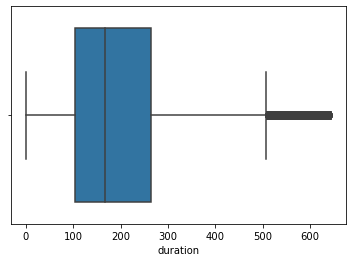

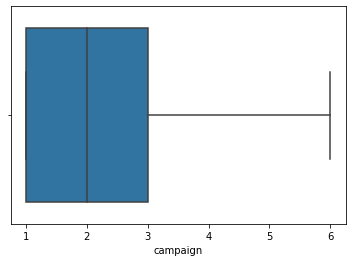

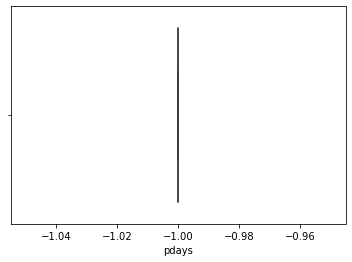

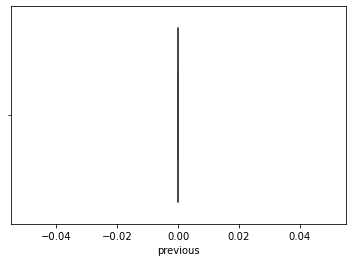

In [17]:
# Checking if outliers has been removed
for col in data_new.select_dtypes(include='number'):
    ax = sns.boxplot(data_new.select_dtypes(include='number')[col])
    plt.show()

In [18]:
# Exporting the dataset without outliers as csv
data_new.to_csv('bank-full-without-outliers.csv', index=False)